In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("survey.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
 df.drop(['Timestamp', 'Country','state','no_employees','coworkers','supervisor', 'mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence','comments','anonymity'], inplace=True, axis=1)

In [7]:
df.describe(include=object)

,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence
count,1259,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,49,2,2,2,4,2,2,3,3,3,3,5,3,3
top,Male,No,No,Yes,Sometimes,No,Yes,Yes,No,No,No,Don't know,No,No
freq,615,1095,767,637,465,883,1031,477,501,842,646,563,490,925


# DATA PREPARATION

In [8]:
df.isnull().sum().sort_values(ascending = False)

work_interfere               264
self_employed                 18
phys_health_consequence        0
mental_health_consequence      0
leave                          0
seek_help                      0
wellness_program               0
care_options                   0
benefits                       0
tech_company                   0
remote_work                    0
treatment                      0
family_history                 0
Gender                         0
Age                            0
dtype: int64

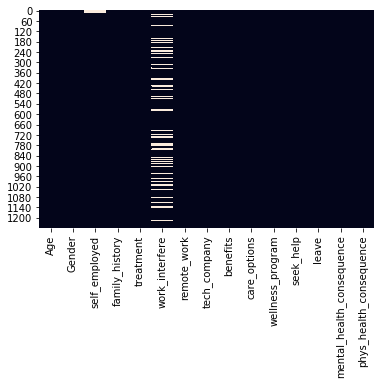

In [9]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

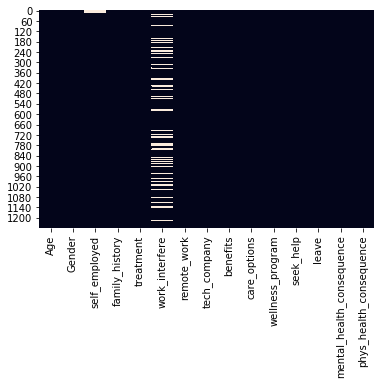

In [10]:
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [11]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [12]:
error={'Female':'F',
       'Male':'M',
       'male':'M',
       'female':'F',
       'm':'M',
       'Male-ish':'M',
       'maile':'M',
       'Trans-female':'T',
       'Cis Female':'F',
       'something kinda male?':'M',
       'Cis Male':'M',
       'Woman':'F',
       'f':'F',
       'Mal':'M',
       'Male (CIS)':'M',
       'queer/she/they':'F',
       'non-binary':'T',
       'Enby':'T',
      'Femake':'F',
      'woman':'F',
      'Make':'M',
      'fluid':'T',
      'Malr':'M',
      'cis male':'M',
      'Female (cis)':'F',
      'Guy (-ish) ^_^':'M',
      'queer':'T',
      'Female (trans)':'T',
      'male leaning androgynous':'T',
       'Neuter':'T',
       'cis-female/femme':'F',
       'msle':'M',
       'Agender':'T',
       'Genderqueer':'T',
       'Female':'F',
       'Androgyne':'T',
       'Nah':'T', 
       'All':'T',
      'Female ':'F',
       'Male ':'M', 
       'Man':'M', 
       'Trans woman':'T', 
       'Mail':'M',
       'femail':'F',
       'Cis Man':'M',
       'ostensibly male, unsure what that really means':'T',
       'A little about you':'T'}

       
df['Gender']=df['Gender'].map(error).fillna(df['Gender'])

In [13]:
df['Gender'].unique()

array(['F', 'M', 'T', 'p'], dtype=object)

In [14]:
df['Gender'].value_counts()

M    993
F    248
T     17
p      1
Name: Gender, dtype: int64

In [15]:
index_names = df[ df['Gender'] == 'p' ].index
df.drop(index_names, inplace = True)

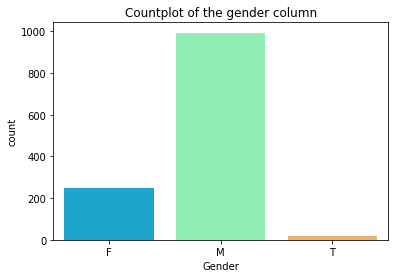

In [16]:
#plotting the countplot for the gender column
sns.countplot(df['Gender'],palette='rainbow')
plt.title("Countplot of the gender column")
plt.show()

In [17]:
# df['Gender']=df['Gender'].replace('F',0)
# df['Gender']=df['Gender'].replace('M',1)
# df['Gender']=df['Gender'].replace('T',2)

In [18]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          72], dtype=int64)

In [19]:
#Removing rebundant values from the age

df = df[df['Age']!=99999999999]
df = df[df['Age']!=-1726]
df = df[df['Age']!=-29]
df=df[df['Age']!=329]
df=df[df['Age']!=5]
df=df[df['Age']!=8]


In [20]:
df['Age']

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1252, dtype: int64

In [21]:
# df['family_history']=df['family_history'].replace('No',0)
# df['family_history']=df['family_history'].replace('Yes',1)
# df['treatment']=df['treatment'].replace('No',0)
# df['treatment']=df['treatment'].replace('Yes',1)
# df['remote_work']=df['remote_work'].replace('No',0)
# df['remote_work']=df['remote_work'].replace('Yes',1)
# df['tech_company']=df['tech_company'].replace('No',0)
# df['tech_company']=df['tech_company'].replace('Yes',1)

In [22]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence
0,37,F,NaN,No,Yes,Often,No,Yes,Yes,Not sure,No,Yes,Somewhat easy,No,No
1,44,M,NaN,No,No,Rarely,No,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No
2,32,M,NaN,No,No,Rarely,No,Yes,No,No,No,No,Somewhat difficult,No,No
3,31,M,NaN,Yes,Yes,Often,No,Yes,No,Yes,No,No,Somewhat difficult,Yes,Yes
4,31,M,NaN,No,No,Never,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,M,No,No,Yes,NaN,No,Yes,No,No,No,No,Somewhat easy,No,No
1255,32,M,No,Yes,Yes,Often,Yes,Yes,Yes,Yes,No,No,Somewhat difficult,No,No
1256,34,M,No,Yes,Yes,Sometimes,No,Yes,Yes,Yes,No,No,Somewhat difficult,Yes,Yes
1257,46,F,No,No,No,NaN,Yes,Yes,No,Yes,No,No,Don't know,Yes,No


In [23]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [24]:
df['benefits'].value_counts()

Yes           473
Don't know    407
No            372
Name: benefits, dtype: int64

In [25]:
# df['benefits']=df['benefits'].replace('No',0)
# df['benefits']=df['benefits'].replace('Yes',1)
# df['benefits']=df['benefits'].replace("Don't know",2)

In [26]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [27]:
df['care_options'].value_counts()

No          499
Yes         440
Not sure    313
Name: care_options, dtype: int64

In [28]:
# df['care_options']=df['care_options'].replace('No',0)
# df['care_options']=df['care_options'].replace('Yes',1)
# df['care_options']=df['care_options'].replace('Not sure',2)

In [29]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [30]:
df['wellness_program'].value_counts()

No            838
Yes           227
Don't know    187
Name: wellness_program, dtype: int64

In [31]:
# df['wellness_program']=df['wellness_program'].replace('No',0)
# df['wellness_program']=df['wellness_program'].replace('Yes',1)
# df['wellness_program']=df['wellness_program'].replace("Don't know",2)

In [32]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [33]:
# df['seek_help']=df['seek_help'].replace('No',0)
# df['seek_help']=df['seek_help'].replace('Yes',1)
# df['seek_help']=df['seek_help'].replace("Don't know",2)

In [34]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [35]:
df['leave'].value_counts()

Don't know            561
Somewhat easy         265
Very easy             204
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64

In [36]:
# df['leave']=df['leave'].replace("Don't know",0)
# df['leave']=df['leave'].replace('Somewhat easy',1)
# df['leave']=df['leave'].replace('Very easy',2)
# df['leave']=df['leave'].replace('Somewhat difficult',3)
# df['leave']=df['leave'].replace('Very difficult',4)


In [37]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [38]:
df['mental_health_consequence'].value_counts()

No       488
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

In [39]:
# df['mental_health_consequence']=df['mental_health_consequence'].replace('No',0)
# df['mental_health_consequence']=df['mental_health_consequence'].replace('Yes',1)
# df['mental_health_consequence']=df['mental_health_consequence'].replace('Maybe',2)

In [40]:
df['phys_health_consequence'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [41]:
# df['phys_health_consequence']=df['phys_health_consequence'].replace('No',0)
# df['phys_health_consequence']=df['phys_health_consequence'].replace('Yes',1)
# df['phys_health_consequence']=df['phys_health_consequence'].replace('Maybe',2)

In [42]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence
0,37,F,NaN,No,Yes,Often,No,Yes,Yes,Not sure,No,Yes,Somewhat easy,No,No
1,44,M,NaN,No,No,Rarely,No,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No
2,32,M,NaN,No,No,Rarely,No,Yes,No,No,No,No,Somewhat difficult,No,No
3,31,M,NaN,Yes,Yes,Often,No,Yes,No,Yes,No,No,Somewhat difficult,Yes,Yes
4,31,M,NaN,No,No,Never,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No


In [43]:
df.dtypes

Age                           int64
Gender                       object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
dtype: object

In [44]:
df['treatment'] = df['treatment'].replace('No', 0)

df['treatment'] = df['treatment'].replace('Yes', 1)

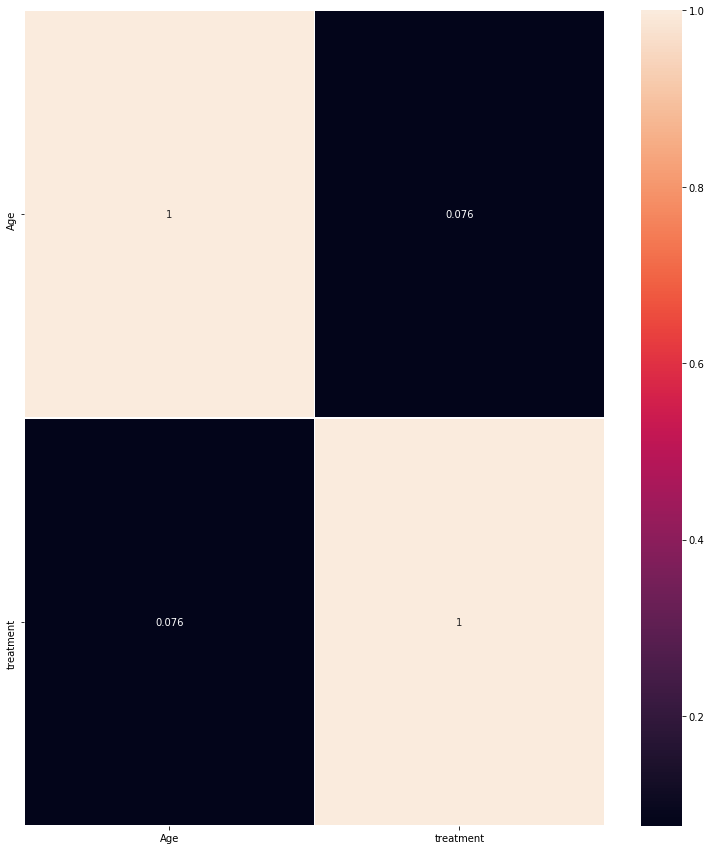

In [45]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(13,15)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

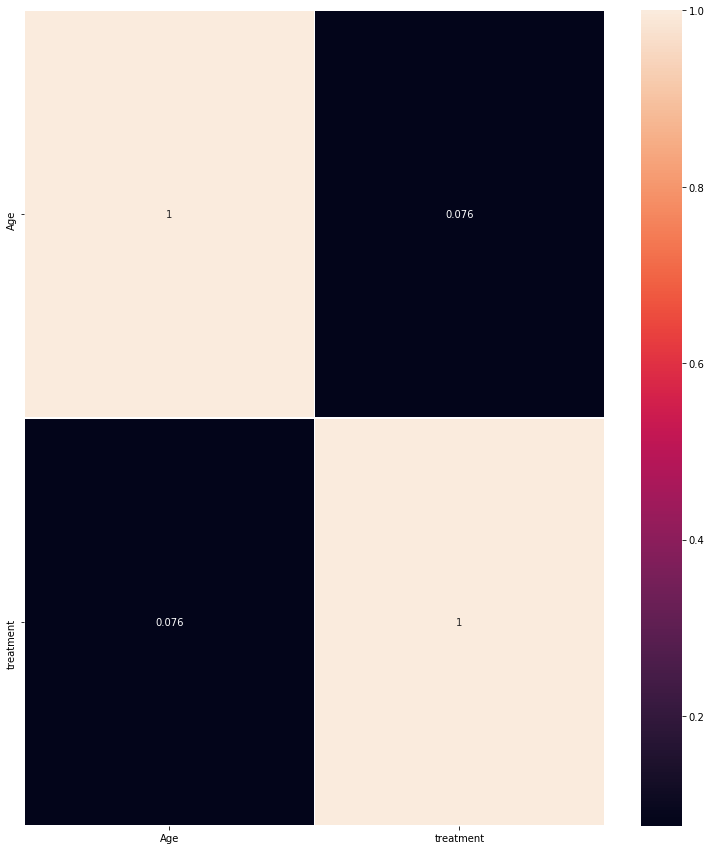

In [46]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(13,15)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [47]:
df_features=df.drop(['treatment'],axis=1)
df_target=df['treatment']

In [48]:
df_dummy=pd.get_dummies(df_features,drop_first=True)

# PREDICTION

In [49]:
X=df_dummy
y=pd.DataFrame(df_target)

In [50]:
X

,Age,Gender_M,Gender_T,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,...,seek_help_No,seek_help_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes
0,37,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,44,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,32,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
3,31,1,0,0,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,31,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
1255,32,1,0,0,1,1,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0
1256,34,1,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,1
1257,46,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,1,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (876, 26)
y_train (876, 1)
X_test (376, 26)
y_test (376, 1)


# SVM

In [53]:
from sklearn.svm import SVC

In [54]:
svclassifier = SVC(kernel = 'linear')

# fit the model
svc_model=svclassifier.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
y_predsvm = svclassifier.predict(X_test)


In [56]:
svclassifier.score(X_test,y_test)

0.8377659574468085

In [57]:
svclassifier.predict(X_train.iloc[0:10])

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [58]:
print(y_train.iloc[0:10])

      treatment
772           0
1123          1
140           1
1059          1
799           1
868           0
1114          0
501           0
254           0
1099          0


In [59]:
type(X_train)

pandas.core.frame.DataFrame

In [60]:
# import pickle
# with open('model.pickle','wb') as f:
#     pickle.dump(svclassifier,f)